<a href="https://colab.research.google.com/github/anipatki/Prodigy_DS_04/blob/main/Prodigy_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train_df=pd.read_csv('/content/twitter_training.csv', encoding='latin-1')
train_df.head()


,Id,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
train_df['Sentiment'] = train_df['Sentiment'].replace('Irrelevant', 'Neutral')

Replaced the 'irrelevant' values in the sentiment column by 'neutral'

In [ ]:
#checking for null values
train_df.isnull().sum()

Id             0
Entity         0
Sentiment      0
Tweet        686
dtype: int64

In [ ]:
#getting rid of null values
train_df=train_df.dropna()

In [ ]:
# Define the cleaning_URLs function to get rid of URLs in the tweet
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|([^s]+.com)|(https?://[^s]+))','',data)

# Apply the cleaning_URLsto the tweet column
train_df['Tweet'] = train_df['Tweet'].apply(cleaning_URLs)

Defined a function cleaning_URLs that removes the unnecessary url links attached to the tweet.

In [ ]:
# Define the cleaning_numbers function to get rid of numbers in the tweet
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

# Apply the cleaning_numbers_udf to the clean_text column
train_df['Tweet'] = train_df['Tweet'].apply(cleaning_numbers)

In [ ]:
# Define the cleaning_punctation function
def cleaning_punctation(data):
    return re.sub('[^a-zA-Z#]+', ' ', data)

# Apply the cleaning_numbers_udf to the clean_text column
train_df['Tweet'] = train_df['Tweet'].apply(cleaning_punctation)

In [ ]:
#removing all emails in the text
pattern_to_remove = r'\S+@\S+'
# Use str.replace() to remove the pattern from the 'text_column'
train_df['Tweet'] = train_df['Tweet'].str.replace(pattern_to_remove, '', regex=True)

We clear out numbers, punctuation marks and emails mentioned in the tweet so that we are only left with words.

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

train_df['Tweet'] = train_df['Tweet'].apply(remove_stopwords)

Removed stopwords like 'is','or','a' etc which does not add information.

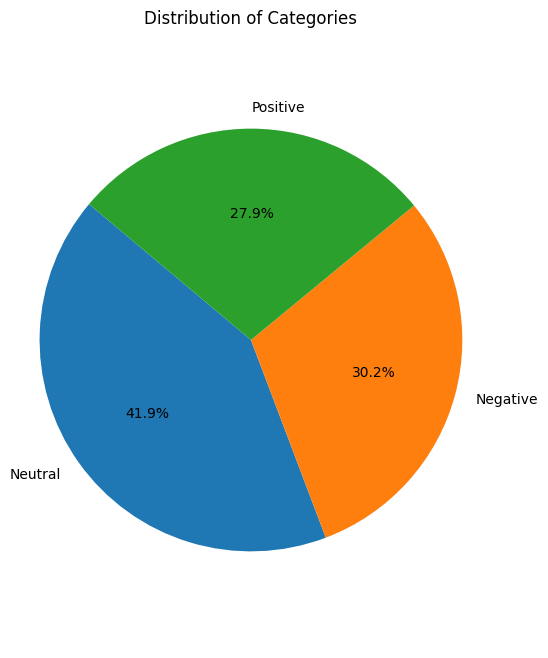

In [ ]:
# Count the occurrences of each category
category_counts = train_df['Sentiment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('Distribution of Categories')
plt.show()

After differentiating the tweets based on whether they are positive,negative or neutral, we find that most of the tweets fall under the 'Neutral' category followed by negative and then positive

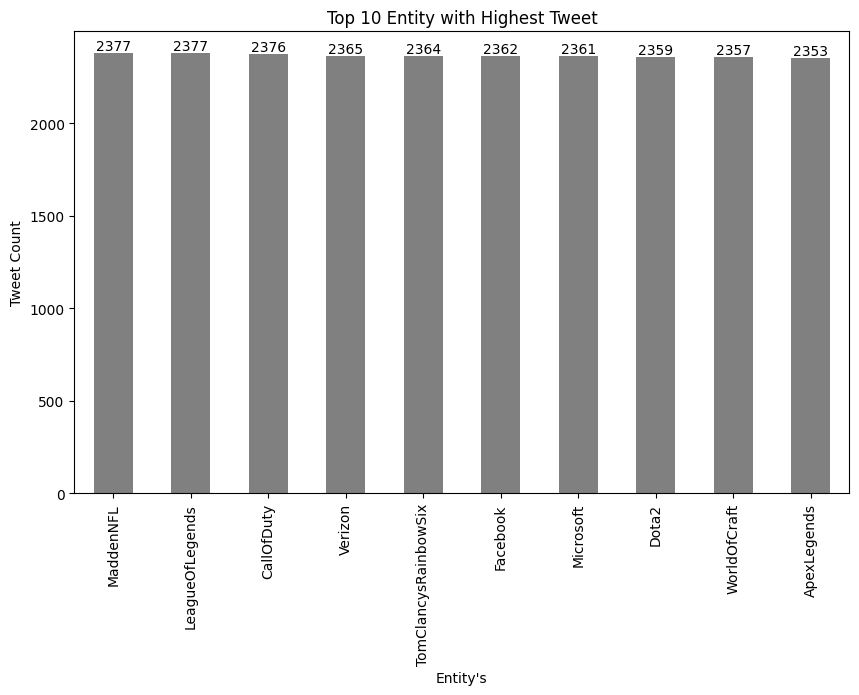

In [ ]:
# Count the occurrences of each category
entity_counts = train_df['Entity'].value_counts()

# Select the top 10 categories
top_10_entity = entity_counts.head(10)


# Plot a bar graph for the top 10 categories
plt.figure(figsize=(10, 6))
top_10_entity.plot(kind='bar', color='Grey')

for i, count in enumerate(entity_counts):
    plt.annotate(str(count), (i, count), ha='center', va='bottom')

plt.xlabel("Entity's")
plt.ylabel('Tweet Count')
plt.title('Top 10 Entity with Highest Tweet')
plt.xticks(rotation=90)
plt.show()

Distinguished tweets based on various categories and counted the frequencies for the same.

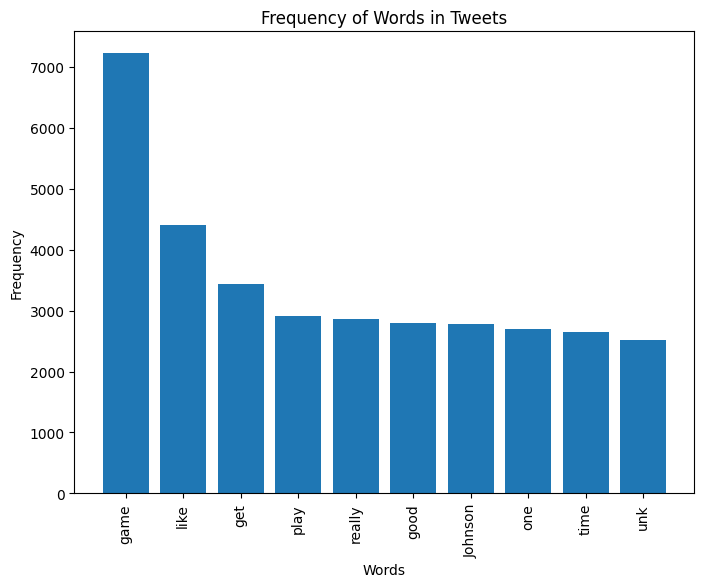

In [ ]:
# Combine all the text into a single string
all_text = " ".join(train_df["Tweet"])

# Split the text into words and explode them into separate rows
word_list = all_text.split()
word_df = pd.DataFrame({"word": word_list})
# Count the frequency of each word and display the top 10
word_df_freq = word_df["word"].value_counts().reset_index()
word_df_freq.columns = ["word", "count"]
top_10_words = word_df_freq.head(10)

plt.figure(figsize=(8, 6))
plt.bar(top_10_words['word'], top_10_words['count'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Words in Tweets')
plt.xticks(rotation=90)
plt.show()

Combined all words together in a string and seperated each one of them and counted frequencies and displayed top 10 words

Number of unique words: 60765


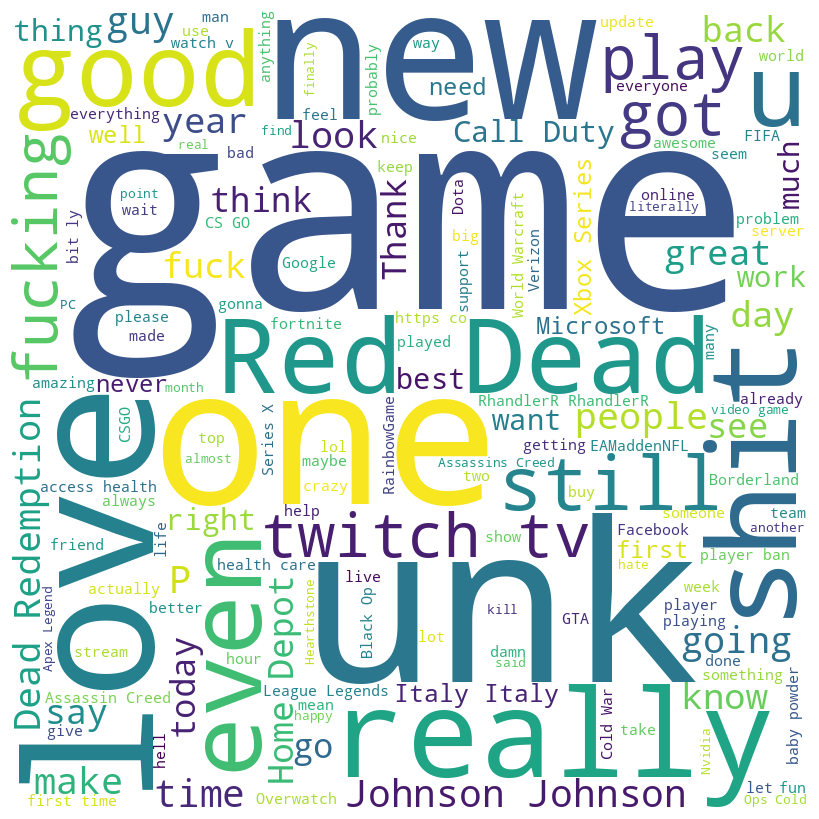

In [ ]:
# to find how many unique words in the vocabulary
unique_words_count = train_df['Tweet'].nunique()
print("Number of unique words:", unique_words_count)

# Extract text data from the 'text_column'
text_data = train_df['Tweet'].astype(str).str.cat(sep=' ')


# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_data)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Word Cloud is a visual represetation of different words used in the document/corpus. The bigger the size of the word, the more is its frequency in the document.

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words="english")
bow = bow_vectorizer.fit_transform(train_df['Tweet'])

Used vectorizer for further pre processing by discarding words appearing in more than 90 percent of the tweets and less than 2 tweets further limited words to 1000 per tweet.

In [ ]:
#spliting the cleaned data into test and train
X_train, X_test, y_train, y_test = train_test_split(bow, train_df['Sentiment'], test_size=0.2, random_state=69)

Split the dataset into train and test. 80-20 split

In [ ]:
#using naive bayes model to make predicitons
model_naive = MultinomialNB().fit(X_train,y_train)
pred = model_naive.predict(X_test)
print('Optimized Accuracy Score: {0: .3f}'.format(accuracy_score(y_test, pred)))

Optimized Accuracy Score:  0.604


In [ ]:
#custom function to calculate the models accuracy
def accuracy(pred, y_test):
    l=0
    for i,j in zip(pred, y_test):
        if i==j:
            l=l+1
    return l/len(pred)

In [ ]:
#using Decision Tress Classifier to make prediction
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
preds=model.predict(X_train)
accuracy(preds,y_train)

0.9237110615582134

Used Naive Bayes and Decision Tree Classifier for predictions with Decision Tree giving a better accuracy.